In [1]:
import torch
import pandas as pd
import numpy as np

In [2]:
a = torch.tensor([1,2,3,4])

# To access an index:
a[2]

tensor(3)

In [3]:
# To check the dtype
a.dtype

torch.int64

In [4]:
# Creating a float tensor
b = torch.FloatTensor([0,1,2,3])
b.type()
print(b)

tensor([0., 1., 2., 3.])


In [5]:
# To change the datatype
a = torch.tensor([4,1,2,3,4])
b = a.type(torch.float32)
b.dtype

torch.float32

In [6]:
# To check the size and the dimension of the tensor
a = torch.Tensor([0,1,2,3,4])
print(a.size())
print(a.ndimension())

torch.Size([5])
1


In [7]:
# To change the dimension of the tensor using "view" method
a = torch.Tensor([0,1,2,3,4])
a_col = a.view(5,1) # Row, column are index
print(a_col)
print(a_col.ndimension())

print(a.view(-1,1)) # If you dont know number of elements write -1 to get all
print(a.view(-1,1).ndimension())

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
2
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
2


In [8]:
# Ex1 Back and forth conversion to pytorch and numpy
numpy_array = np.array([0.0,1.0,2.0,3.0,4.0])
torch_tensor = torch.from_numpy(numpy_array)
back_to_numpy = torch_tensor.numpy()

#Ex2 Pandas series to tensors
pandas_series = pd.Series([0.1,2,0.3,10.1])
pandas_to_torch = torch.from_numpy(pandas_series.values)

#Ex3 Back and forth from list
this_tensor = torch.tensor([0,1,2,3])
torch_to_list=this_tensor.tolist() # This is a list now

In [9]:
# Indexing and slicing is exactly same as python
c = torch.tensor([100,1,2,3,4])
d = c[1:4]
print(d)

# Assigning new values
c[3:5] = torch.tensor([300.0,400.0])
print(c)

tensor([1, 2, 3])
tensor([100,   1,   2, 300, 400])


In [10]:
# Basic tensor opertaion
u = torch.tensor([1.0,2.0])
v = torch.tensor([2.0,3.0])

# Note the tensors should be of same type
z = u + v
print(z)

# scalar addition multiplicatiom is straight forward
z+1 # scalar addition - This is broadcasting
2*z # scalar multiplication

# Multiplication of two vectors:
print("Multiplication of two vectors", u*v)

# Dot product
print("Dot product of two vectos", torch.dot(u,v))

# Mean of a tensor 
print("Mean", u.mean()) # similarly max, min

# Using np.pi
x = torch.tensor([0, np.pi/2, np.pi])

# Applying sin function to all the elements in a tensor
y = torch.sin(x) # similarly cos, tan and so on
print("After sin function", y)

tensor([3., 5.])
Multiplication of two vectors tensor([2., 6.])
Dot product of two vectos tensor(8.)
Mean tensor(1.5000)
After sin function tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


In [11]:
# linspace function -to generate a tensor

x = torch.linspace(-2,2,steps = 5) # 5 steps are defined in this
print(x)

#num parameter
x = torch.linspace(-2,2,steps= 9) # gives evenly spaced elemets forming a tensor
print(x)

tensor([-2., -1.,  0.,  1.,  2.])
tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


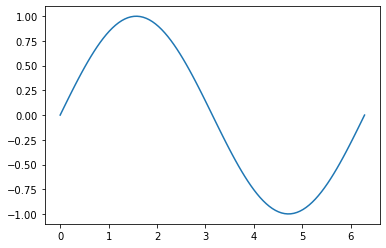

In [12]:
# Plotting mathematical functions
x = torch.linspace(0,2*np.pi, 100)
y = torch.sin(x)
 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x.numpy(), y.numpy())

## 2-D Tensors

In [13]:
# Ex1
a = [[11,12,13], [21,22,23],[31,32,33]]
A = torch.tensor(a)
print(A)

# ndimension is also sometimes called as rank
print("Dimension", A.ndimension())

# shape gives the total rows and column
print("Shape", A.shape)
      
# numel method gives us the total elements in the tensor
print("Total Elements", A.numel())

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Dimension 2
Shape torch.Size([3, 3])
Total Elements 9


In [14]:
# Indexing and slicing of 2-D tensor
print("A[1][2]:", A[1][2])
print("A[1:3,2]", A[1:3,2])

# Basic operations in tensors:
# Simple A+B, A-B and so on

# Multiplying by a scalar
print("2*A:",2*A)

# Hadamard product is also easy - A*B and so on

# Matrix multiplication
A = torch.tensor([[0,1,1],[1,0,1]])
B = torch.tensor([[1,1],[1,1],[-1,1]])
C = torch.mm(A,B)
print(C)


A[1][2]: tensor(23)
A[1:3,2] tensor([23, 33])
2*A: tensor([[22, 24, 26],
        [42, 44, 46],
        [62, 64, 66]])
tensor([[0, 2],
        [0, 2]])


## Differentiation in PyTorch

In [15]:
# Differential in PyTorch
x = torch.tensor(2.0, requires_grad = True) # Tells pytorch that this value will be used while evaluating the differential
y = x**2

In [16]:
y.backward() # Note
'''
1. The backward function calculates the derivative of y

2. Now to evaluate the derivative of y at x equals 2, 
we need to call the grad attribute on x. 
Doing so takes the value of x equals 2 and plugs it in y’s derivative
'''
# print(x.grad)

# Ex2 z = x**2 + 2*x + 1 , let say we want to evaluate the value, its derivate value at x = 2 then:

x = torch.tensor(2.0, requires_grad = True)
z = x**2 + 2*x + 1
z.backward()
print("x.grad", x.grad) # this will be six as the value after the differentiation of z at x = 2 is 6

x.grad tensor(6.)


## Partial Differentiation in PyTorch

In [17]:
u = torch.tensor(1.0,requires_grad = True)
v = torch.tensor(2.0,requires_grad = True)
f = u*v + u**2
f.backward() # does partial differentiation both with respect to u and v
print(u.grad) # partially differentiates f w.r.t. u and then puts u=1, v=2 
print(v.grad) # partially differentiates f w.r.t. v and then puts u=1, v=2 

tensor(4.)
tensor(1.)


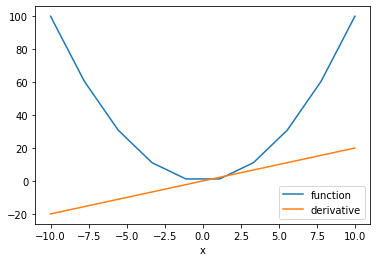

In [18]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

The  method <code> detach()</code>  excludes further tracking of operations in the graph, and therefore the subgraph will not record operations. This allows us to then convert the tensor to a numpy array. To understand the sum operation

In [19]:
torch.ones(1,2)

tensor([[1., 1.]])

## Simple Dataset

In [44]:
from torch.utils.data import Dataset
class toy_set(Dataset):
    
    def __init__(self, length = 100, transform = None):
        self.x = 2*torch.ones(length,2)
        self.y = torch.ones(length,1)
        
        self.len = length
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            if self.transform:
                sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.len

In [57]:
# Printing the dataset
dataset = toy_set()
for i in range(3):
    x,y = dataset[i]
    print('x:', x, 'y:', y)

x: tensor([2., 2.]) y: tensor([1.])
x: tensor([2., 2.]) y: tensor([1.])
x: tensor([2., 2.]) y: tensor([1.])


## Transforms

In [58]:
class add_mult(object):
    def __init__(self, addx = 1, muly = 1):
        self.addx=addx
        self.muly=muly
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x+=self.addx
        y*=self.muly
        sample = x,y
        return sample

In [52]:
dataset = toy_set()
a_m = add_mult()

x_,y_ = a_m(dataset[0])

print("x_:", x_, "y_:", y)

x_: tensor([3., 3.]) y_: tensor([1.])


In [60]:
# Applying transformation to entire data
dataset = toy_set()
dataset_ = toy_set(transform = a_m) # "_" denotes the transformed data

print(dataset[0], 'Transformed:',dataset_[0])

(tensor([2., 2.]), tensor([1.])) Transformed: (tensor([3., 3.]), tensor([1.]))


## Transform Compose

In [61]:
from torchvision import transforms

# Creating one more function:
class mult(object):
    def __init__(self, mul = 100):
        self.mul=mul
        
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x*=self.mul
        y*=self.mul
        sample = x,y
        return sample

In [85]:
dataset = toy_set()
data_transform=transforms.Compose([add_mult(), mult()]) # works like a pipeline
x_,y_ = data_transform(dataset[0])

# Or you can pass this directly to the dataset
dataset_ = toy_set(transform = data_transform)

In [87]:
dataset_[0]

(tensor([30100., 30100.]), tensor([10000.]))

## Unstructured Datasets

Run the below 2 lines of code if you havent downloaded data yet

In [ ]:
#! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P resources/data

In [ ]:
#!tar -xf resources/data/img.tar.gz 

In [36]:
from PIL import Image
import pandas as pd
import os
from matplotlib.pyplot import imshow
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [37]:
directory = "resources/data"
csv_file = "index.csv"
csv_path = os.path.join(directory, csv_file)

data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


File Name img/fashion1.png
class or y: T-shirt


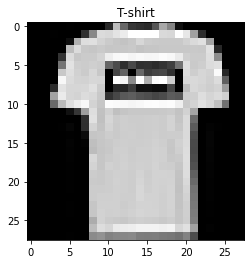

In [39]:
# How to check an image using Image function from PIL
print('File Name', data_name.iloc[1,1])
print("class or y:", data_name.iloc[1,0])

image_name = data_name.iloc[1,1]
image_path = os.path.join(directory,image_name)


image = Image.open(image_path)
plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
plt.title(data_name.iloc[1,0])
plt.show()

In [40]:
class Dataset(Dataset):
    def __init__(self, csv_file, data_dir, transform = None):
        self.transform = transform
        
        self.data_dir=data_dir
        data_dircsv_file = os.path.join(self.data_dir, csv_file)
        
        self.data_name = pd.read_csv(data_dircsv_file)
        
        self.len = self.data_name.shape[0]
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx,1])
        image = Image.open(img_name)
        
        y = self.data_name.iloc[idx,0]
        
        if self.transform:
            image = self.transform(image)
            
        return image,y

In [45]:
dataset = Dataset(csv_file=csv_file, data_dir = directory)
image0 = dataset[0][0]
label0 = dataset[0][1]

image0

## Torchvision transforms

In [62]:
import torchvision.transforms as transforms

#transforms.CenterCrop(20) # helps in cropping the image 
#transforms.ToTensor() # Converts the image to a tensor

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file = csv_file, data_dir=directory, transform = croptensor_data_transform)

In [55]:
dataset[0][0].shape

torch.Size([1, 20, 20])

## Torchvision Datasets

In [56]:
import torchvision.datasets as dsets

In [59]:
# Using MNIST dataset
dataset = dsets.MNIST(root='./data',
                      train = False,
                      download = True,
                      transform = transforms.ToTensor())


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



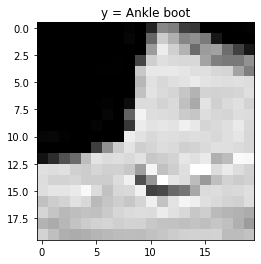

In [70]:
dataset = Dataset(csv_file = csv_file, data_dir=directory, transform = croptensor_data_transform)
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])
    
show_data(dataset[0],shape = (20, 20))